# CPSC 4970 AI + ML: Module 3

In [1]:
import sklearn.datasets
from IPython.core.display import display
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import mglearn.datasets
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.compose import TransformedTargetRegressor

from math import sqrt

plt.style.use('dark_background')

## Load data

In [2]:
db = sklearn.datasets.load_diabetes(as_frame=True)['frame']
display(db.info())
train, test = train_test_split(db, test_size=0.33, random_state=0)
# X = everything but last column
X_train = train.iloc[:, :-1]
X_test = test.iloc[:, :-1]
# y = target column
y_train = train['target']
y_test = test['target']

display(y_train.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


None

93      96.0
245    125.0
272    182.0
241    177.0
92      48.0
18      97.0
145    259.0
150    288.0
322    242.0
393     69.0
Name: target, dtype: float64

## L2 Regularization: Ridge

Training MSE:  2803.0139148186577
Training R2:  0.5517996422177895
152.11070640884333 [ -23.44310726 -161.17494279  530.52058493  264.29851737  -60.08992941
  -97.28632531 -206.8758798    71.47924174  481.71455991   64.99995236]


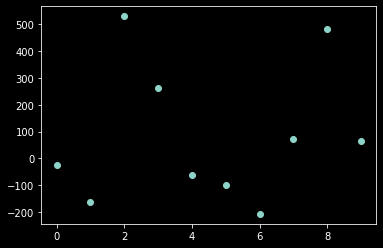

In [3]:
lr = Ridge(alpha=0.1).fit(X_train, y_train)
train_predicted = lr.predict(X_train)
print("Training MSE: ", mean_squared_error(y_train, train_predicted))
print("Training R2: ", lr.score(X_train, y_train))
print(lr.intercept_, lr.coef_)
plt.scatter(range(len(lr.coef_)), lr.coef_)

## L1 Regularization: Lasso

Training MSE:  2802.441978212913
Training R2:  0.5518910945612717
152.19718543432265 [  -0.         -115.57697621  583.86628386  228.46862953 -109.30490161
   -0.         -182.92422888    0.          567.21633773    0.        ]


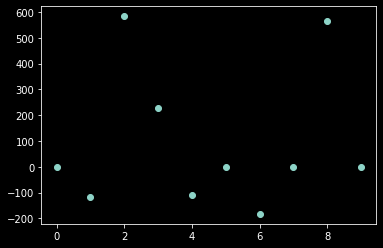

In [4]:
lr = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
train_predicted = lr.predict(X_train)
print("Training MSE: ", mean_squared_error(y_train, train_predicted))
print("Training R2: ", lr.score(X_train, y_train))
print(lr.intercept_, lr.coef_)
plt.scatter(range(len(lr.coef_)), lr.coef_)

## Preprocessing using the standard scaler

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler>

In [5]:
display(train.describe())
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
display(pd.DataFrame(X_train_scaled).describe())
lr = LinearRegression().fit(X_train_scaled, y_train)
train_predicted = lr.predict(X_train_scaled)
display("Training MSE: ", mean_squared_error(y_train, train_predicted))
print("Training R2: ", lr.score(X_train_scaled, y_train))

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,-0.000250,0.001731,-0.000926,0.001591,-0.000839,-0.001474,0.001245,-0.000696,-0.000741,-0.000504,151.263514
std,0.048678,0.047724,0.048273,0.047166,0.047392,0.047593,0.048449,0.048677,0.048882,0.051120,79.215720
min,-0.107226,-0.044642,-0.084886,-0.108957,-0.108893,-0.115613,-0.102307,-0.076395,-0.126097,-0.137767,25.000000
25%,-0.038207,-0.044642,-0.035307,-0.033214,-0.034936,-0.032159,-0.032356,-0.039493,-0.034847,-0.038357,83.000000
50%,0.005383,-0.044642,-0.008362,-0.002228,-0.004321,-0.004915,-0.004744,-0.002592,-0.004225,-0.001078,140.000000
75%,0.035352,0.050680,0.030440,0.035644,0.026294,0.023581,0.030232,0.034309,0.030093,0.032059,217.500000
max,0.110727,0.050680,0.170555,0.132044,0.153914,0.198788,0.181179,0.185234,0.133599,0.135612,346.000000


,0,1,2,3,4,5,6,7,8,9
count,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,296.000000,2.960000e+02
mean,-2.100422e-17,-7.201447e-17,2.400482e-17,-1.050211e-17,-1.200241e-17,-2.100422e-17,-9.001808e-18,2.700542e-17,0.000000,-1.200241e-17
std,1.001693e+00,1.001693e+00,1.001693e+00,1.001693e+00,1.001693e+00,1.001693e+00,1.001693e+00,1.001693e+00,1.001693,1.001693e+00
min,-2.201328e+00,-9.733285e-01,-1.742227e+00,-2.347793e+00,-2.283887e+00,-2.402296e+00,-2.140974e+00,-1.557740e+00,-2.568797,-2.689643e+00
25%,-7.810837e-01,-9.733285e-01,-7.134231e-01,-7.391764e-01,-7.206846e-01,-6.458277e-01,-6.947140e-01,-7.983798e-01,-0.698897,-7.417152e-01
50%,1.159125e-01,-9.733285e-01,-1.542904e-01,-8.110603e-02,-7.359138e-02,-7.242168e-02,-1.238219e-01,-3.901982e-02,-0.071383,-1.124226e-02
75%,7.325975e-01,1.027402e+00,6.508607e-01,7.232023e-01,5.735018e-01,5.273479e-01,5.993081e-01,7.203402e-01,0.631858,6.380670e-01
max,2.283654e+00,1.027402e+00,3.558351e+00,2.770532e+00,3.270935e+00,4.214942e+00,3.720185e+00,3.826123e+00,2.752890,2.667158e+00


'Training MSE: '

2757.5878003192224

Training R2:  0.5590632525279866


## Transforming the target

<https://scikit-learn.org/stable/modules/generated/sklearn.compose.TransformedTargetRegressor.html#sklearn.compose.TransformedTargetRegressor>

In [6]:
lr = TransformedTargetRegressor(regressor=LinearRegression(),
                                transformer=StandardScaler()).fit(X_train_scaled, y_train)

train_predicted = lr.predict(X_train_scaled)
display("Training MSE: ", mean_squared_error(y_train, train_predicted))
print("Training R2: ", lr.score(X_train_scaled, y_train))

'Training MSE: '

2757.5878003192215

Training R2:  0.5590632525279866


## Hyperparameter selection: polynomial degree

[53.28344317844128, 45.51196726633421, 2.3583227087802455e-12, 6.113190304359754e-13, 2.409016020068406e-12]
[52.53345560130045, 60.85442216001462, 640.4407671257561, 151.02088619425726, 265.86951568303493]


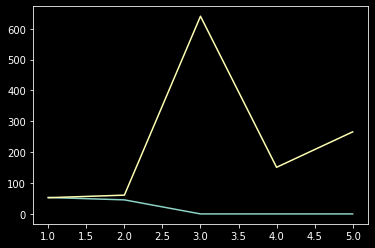

In [13]:
X_train2_scaled, X_valid_scaled, y_train2, y_valid = train_test_split(X_train_scaled, y_train)
training_errors = []
validation_errors = []
degrees = [1, 2, 3, 4, 5]
for degree in degrees:
    features = PolynomialFeatures(degree=degree).fit(X_train2_scaled)
    lr = TransformedTargetRegressor(regressor=LinearRegression(),
                                    transformer=StandardScaler()).fit(features.transform(X_train2_scaled), y_train2)
    training_errors.append(sqrt(mean_squared_error(y_train2, lr.predict(features.transform(X_train2_scaled)))))
    validation_errors.append(sqrt(mean_squared_error(y_valid, lr.predict(features.transform(X_valid_scaled)))))
print(training_errors)
print(validation_errors)
plt.plot(degrees, training_errors)
plt.plot(degrees, validation_errors)

## Conclusion: polynomial features are a bad choice for this data...?

## Hyperparameter selection: L1 regularization coefficient

[52.16300616546052, 53.17421528143648, 54.00711927038751, 55.367539459950514, 57.20146989168595, 61.200400542026145, 66.03961570143252, 71.78377441726104, 76.86792458122672, 79.91873630641953, 79.91873630641953, 79.91873630641953]
[54.93408949398851, 55.759638021997766, 56.050444836798526, 56.88197587848891, 58.21387934856366, 61.30679951582735, 65.43506733559352, 70.63021117379671, 74.94946408288386, 77.36432334600403, 77.36432334600403, 77.36432334600403]


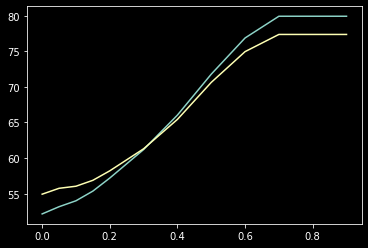

In [17]:
X_train2_scaled, X_valid_scaled, y_train2, y_valid = train_test_split(X_train_scaled, y_train, test_size=0.33)
training_errors = []
validation_errors = []
alphas = [0.0001, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for alpha in alphas:
    lr = TransformedTargetRegressor(regressor=Lasso(alpha=alpha),
                                    transformer=StandardScaler()).fit(X_train2_scaled, y_train2)
    training_errors.append(sqrt(mean_squared_error(y_train2, lr.predict(X_train2_scaled))))
    validation_errors.append(sqrt(mean_squared_error(y_valid, lr.predict(X_valid_scaled))))
print(training_errors)
print(validation_errors)
plt.plot(alphas, training_errors)
plt.plot(alphas, validation_errors)